# **SVM - Kernel comparison**

## Kernel interpretation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# from mpl_toolkits import mplot3d
from PIL import Image
from sklearn.svm import SVC
from sklearn.datasets import make_gaussian_quantiles

(250, 2) (250,)


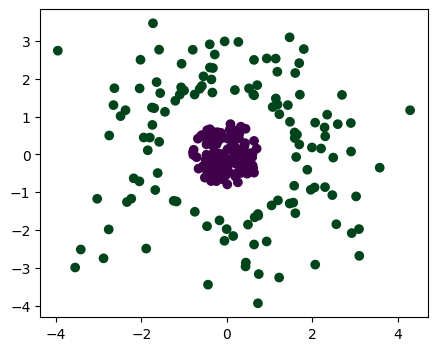

In [ ]:
X, y = make_gaussian_quantiles(cov=2,
                                 n_samples = 250 , n_features = 2 ,
                                 n_classes = 2 , random_state = 1)

print(X.shape, y.shape)
X[y == 0] = X[y == 0] * 0.5

_,ax = plt.subplots(figsize=(5,4))
ax.scatter( X[:,0] , X[:,1] , c = y , cmap='PRGn')

In [ ]:
z = X[:,0]**2 + X[:,1]**2
print(z.shape)

(250,)


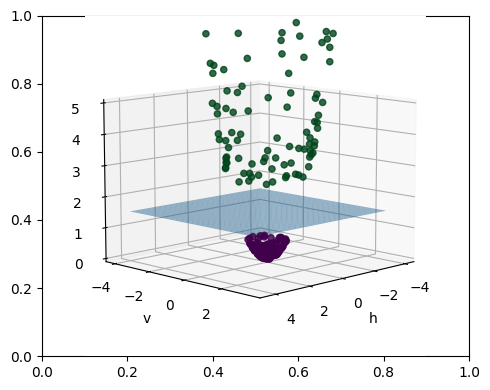

In [ ]:
f, _ = plt.subplots(figsize=(5,4))
ax = f.add_subplot(projection='3d')
ax.view_init(10, 45)
ax.scatter3D( X[:,0] , X[:,1] , z , c = y , alpha = 0.8 , cmap='PRGn')
plt.tight_layout()
ax.set_zlim(0,5)
ax.set_xlabel('h')
ax.set_ylabel('v')

h_grid, v_grid = np.meshgrid(np.linspace(-4,4,50), np.linspace(-4,3,50))
z_grid = np.ones(h_grid.shape) * 1.5
ax.plot_surface(h_grid,v_grid,z_grid, alpha=0.5)

In [ ]:
# Sve all figs
for angle in range(0, 91, 5):
  f, _ = plt.subplots(figsize=(8,7))
  ax = f.add_subplot(projection='3d')
  ax.view_init(angle,45)
  ax.scatter3D(X[:,0],X[:,1], z, c=y,alpha = 0.8, cmap='Paired')
  #ax.plot_surface(h_grid,v_grid,z_grid, alpha = 0.5)
  #ax.set_zlim(0, 5)
  plt.tight_layout()
  plt.savefig("imgs/{0}.png".format(angle))
  plt.close(), plt.clf()

<Figure size 640x480 with 0 Axes>

In [ ]:
import os
from PIL import Image
from natsort import natsorted,ns

list_images = []

# Save a gif
for img in natsorted(os.listdir('imgs/')):
  image = Image.open('imgs/' + img)
  list_images.append(image)

image.save("animation.gif", save_all=True, append_images=list_images, duration=200, loop=0)

## SVM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification

(250, 2) (250,)


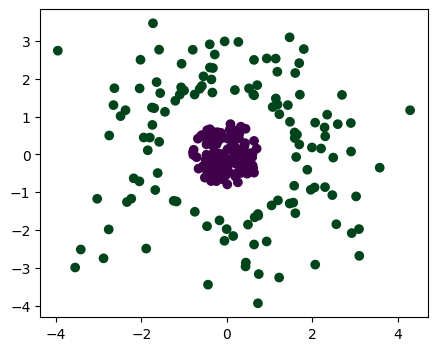

In [ ]:
X, y = make_gaussian_quantiles(cov=2,
                                 n_samples = 250 , n_features = 2 ,
                                 n_classes = 2 , random_state = 1)

print(X.shape, y.shape)
X[y == 0] = X[y == 0] * 0.5

_,ax = plt.subplots(figsize=(5,4))
ax.scatter( X[:,0] , X[:,1] , c = y , cmap='PRGn')

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from drive.MyDrive.Machine_Learning.Funciones.decision_grid import fronteras_decision

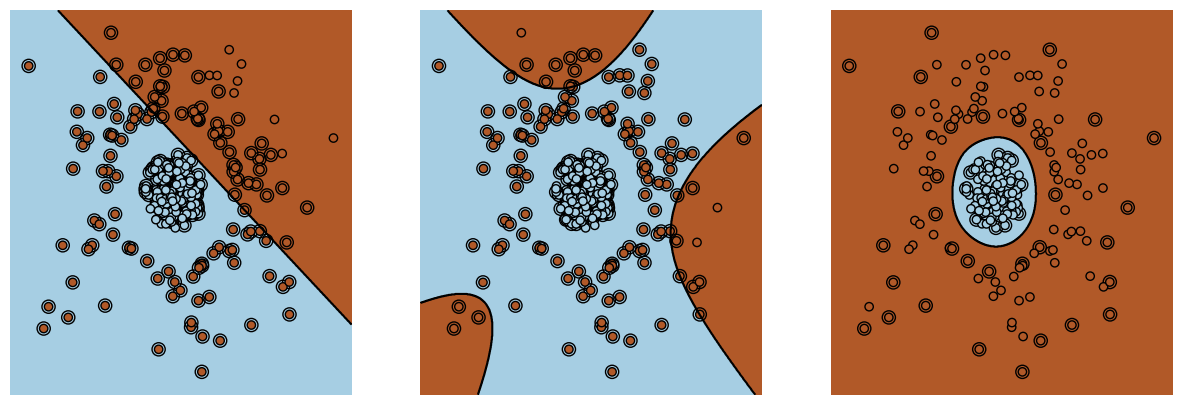

In [ ]:

kernels = ['linear', 'poly', 'rbf']

_, axes = plt.subplots(1,3, figsize = (15,5))

# fit the model
for i, kernel in enumerate(kernels) :
    #
    clf = SVC(kernel = kernel , gamma = 1)
    clf.fit( X , y )
    predictions, h_grid, v_grid= fronteras_decision(X,clf)


    axes[i].pcolormesh( h_grid , v_grid , predictions, cmap = plt.cm.Paired)
    axes[i].contour( h_grid , v_grid , predictions, colors=['k', 'k'], linestyles=['-', '-'], levels=[0, 1])

    axes[i].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 90, facecolors = 'none', edgecolors = 'k')

    axes[i].scatter( X[:,0] , X[:,1] , c = y , cmap=plt.cm.Paired, edgecolors='k')
    axes[i].set_axis_off()

plt.show()

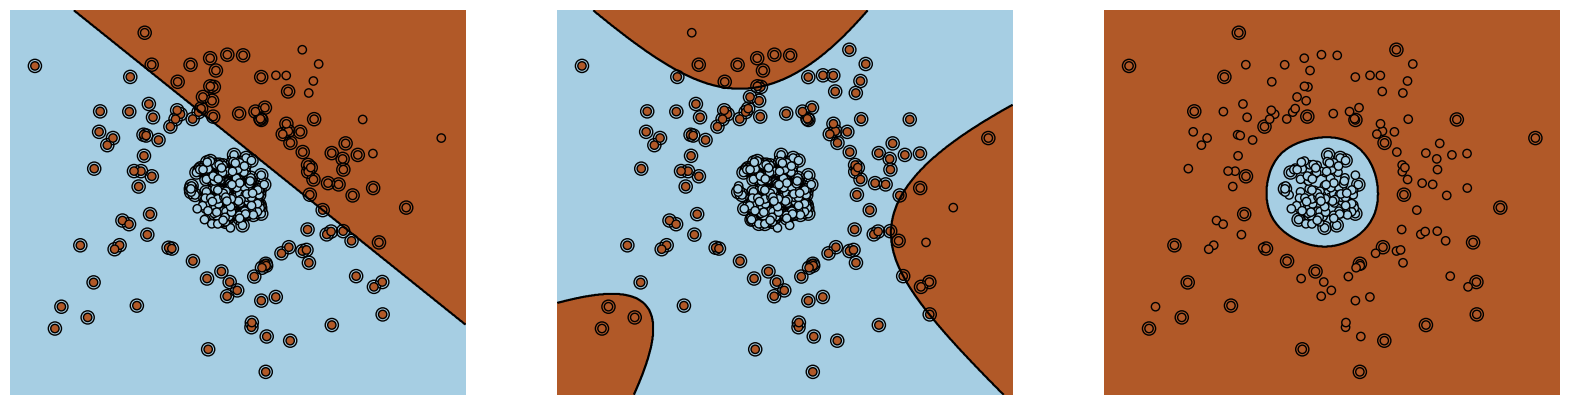

In [ ]:

kernels = ['linear', 'poly', 'rbf']

_, axes = plt.subplots(1,3, figsize = (20,5))

# fit the model
for i, kernel in enumerate(kernels):
    #
    clf = SVC(kernel = kernel , gamma = 1)
    clf.fit( X , y )
    predictions, h_grid, v_grid= fronteras_decision(X,clf)

    axes[i].pcolormesh( h_grid , v_grid , predictions, cmap = plt.cm.Paired)
    axes[i].contour( h_grid , v_grid , predictions, colors=['k', 'k'], linestyles=['-', '-'], levels=[0, 1])

    axes[i].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 90, facecolors = 'none', edgecolors = 'k')

    axes[i].scatter( X[:,0] , X[:,1] , c = y , cmap=plt.cm.Paired, edgecolors='k')
    axes[i].set_axis_off()

plt.show()

Create a function that plots the decision boundaries of a given SVM

## In real data

Evaluate the different SVM kernels in the Iris and Fruits datasets